In [11]:
import torch
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import csv

In [12]:
# Dataset config
NUM_ENCODE_TIME_STEPS = 40
NUM_DECODE_TIME_STEPS = 2

DATA_TYPE = "sin"

In [13]:
# Makeup data tensor

temp_tensor = torch.empty(20000)


if DATA_TYPE == "polynomial":
    temp_tensor[0] = 1
    for i in range(1, 20000):
        temp_tensor[i] = temp_tensor[i-1] * 1.0001
elif DATA_TYPE == "linear":
    for i in range(20000):
        temp_tensor[i] = 3 + i
elif DATA_TYPE == "sin":
    for i in range(20000):
        temp_tensor[i] = math.sin(3 * i / 100) + math.cos(2 * i / 100) + math.log(i + 2) * 3
else:
    raise(NotImplementedError)

print(temp_tensor)
print(temp_tensor.shape)


tensor([ 3.0794,  4.3256,  5.2180,  ..., 29.2687, 29.2556, 29.2425])
torch.Size([20000])


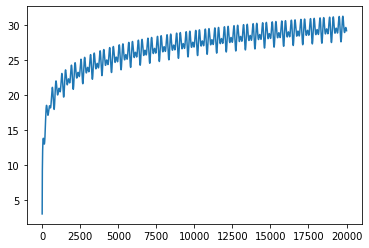

In [14]:
plt_time = list(range(len(temp_tensor)))
plt.plot(plt_time, temp_tensor, label="Temperature")

In [15]:
# Make input time serie data and target time serie data tensor 
num_data = (len(temp_tensor) - NUM_DECODE_TIME_STEPS - NUM_ENCODE_TIME_STEPS) // NUM_DECODE_TIME_STEPS

X_shape = (num_data, NUM_ENCODE_TIME_STEPS)
y_shape = (num_data, NUM_DECODE_TIME_STEPS)

print("Encode time serie data shape:", X_shape)
print("Decode time serie data shape:", y_shape)

X = torch.empty(X_shape)
y = torch.empty(y_shape)

j = 0
# Change from last time step (more numerically stable for the neural net)
for i in range(len(X)):
    serie_start_i = i * NUM_DECODE_TIME_STEPS
    serie_end_i = NUM_ENCODE_TIME_STEPS + (i+1) * NUM_DECODE_TIME_STEPS
    time_serie = (temp_tensor[serie_start_i+1:serie_end_i+1] - temp_tensor[serie_start_i:serie_end_i]) / temp_tensor[serie_start_i:serie_end_i]
    X[j] = time_serie[:NUM_ENCODE_TIME_STEPS]
    y[j] = time_serie[NUM_ENCODE_TIME_STEPS:]
    
    j += 1
print("Training X:\n", X)
print("Training y:\n", y)

Encode time serie data shape: (9979, 40)
Decode time serie data shape: (9979, 2)
Training X:
 tensor([[ 4.0468e-01,  2.0631e-01,  1.3383e-01,  ...,  5.9609e-03,
          5.6907e-03,  5.4316e-03],
        [ 1.3383e-01,  9.7255e-02,  7.5539e-02,  ...,  5.4316e-03,
          5.1827e-03,  4.9435e-03],
        [ 7.5539e-02,  6.1298e-02,  5.1306e-02,  ...,  4.9435e-03,
          4.7130e-03,  4.4908e-03],
        ...,
        [-5.1823e-05, -6.8459e-05, -8.5034e-05,  ..., -4.5891e-04,
         -4.6010e-04, -4.6070e-04],
        [-8.5034e-05, -1.0155e-04, -1.1781e-04,  ..., -4.6070e-04,
         -4.6052e-04, -4.5982e-04],
        [-1.1781e-04, -1.3408e-04, -1.5003e-04,  ..., -4.5982e-04,
         -4.5834e-04, -4.5614e-04]])
Training y:
 tensor([[ 0.0052,  0.0049],
        [ 0.0047,  0.0045],
        [ 0.0043,  0.0041],
        ...,
        [-0.0005, -0.0005],
        [-0.0005, -0.0005],
        [-0.0005, -0.0004]])


In [16]:
X = X * 100
y = y * 100

In [17]:
torch.save(X, "./../X.pt")
torch.save(y, "./../y.pt")

In [18]:
X = torch.load("./../X.pt")
y = torch.load("./../y.pt")
print(X)
print(y)

tensor([[ 4.0468e+01,  2.0631e+01,  1.3383e+01,  ...,  5.9609e-01,
          5.6907e-01,  5.4316e-01],
        [ 1.3383e+01,  9.7255e+00,  7.5539e+00,  ...,  5.4316e-01,
          5.1827e-01,  4.9435e-01],
        [ 7.5539e+00,  6.1298e+00,  5.1306e+00,  ...,  4.9435e-01,
          4.7130e-01,  4.4908e-01],
        ...,
        [-5.1823e-03, -6.8459e-03, -8.5034e-03,  ..., -4.5891e-02,
         -4.6010e-02, -4.6070e-02],
        [-8.5034e-03, -1.0155e-02, -1.1781e-02,  ..., -4.6070e-02,
         -4.6052e-02, -4.5982e-02],
        [-1.1781e-02, -1.3408e-02, -1.5003e-02,  ..., -4.5982e-02,
         -4.5834e-02, -4.5614e-02]])
tensor([[ 0.5183,  0.4944],
        [ 0.4713,  0.4491],
        [ 0.4276,  0.4069],
        ...,
        [-0.0461, -0.0460],
        [-0.0458, -0.0456],
        [-0.0453, -0.0450]])


In [19]:
print(X.shape)
print("Average absolute change:", torch.mean(torch.absolute(X)))
print("Maximum change:", torch.max(y))
print("Minimum change:", torch.min(y))

torch.Size([9979, 40])
Average absolute change: tensor(0.0826)
Maximum change: tensor(0.5183)
Minimum change: tensor(-0.2245)


In [20]:
# Checking for nan data
assert(torch.sum(X != X) == 0)
assert(torch.sum(y != y) == 0)